In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [21]:
arrests = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")

yearArrests = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")

In [3]:
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [4]:
arrests["PERP_RACE"].value_counts()

BLACK                             2330925
WHITE HISPANIC                    1249880
WHITE                              579414
BLACK HISPANIC                     384279
ASIAN / PACIFIC ISLANDER           193101
UNKNOWN                             48924
AMERICAN INDIAN/ALASKAN NATIVE      10453
OTHER                                1363
Name: PERP_RACE, dtype: int64

In [5]:
arrests.shape

(4798339, 18)

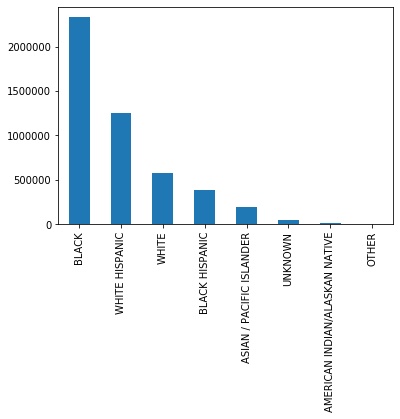

In [8]:
arrests["PERP_RACE"].value_counts().plot(kind='bar')


In [16]:
print(arrests["Latitude"].max(),
arrests["Latitude"].min(), 
arrests["Longitude"].max(), 
arrests["Longitude"].min())

62.08307497800007 40.49890536300006 -73.68178026799995 -74.25493873599999


In [20]:
arrests["Latitude"].value_counts(bins=30)

(40.476, 41.218]    4791238
(48.413, 49.133]       1968
(43.377, 44.096]       1094
(59.205, 59.925]        865
(51.291, 52.01]         827
(46.255, 46.974]        536
(54.169, 54.888]        524
(56.327, 57.047]        451
(45.535, 46.255]        416
(61.364, 62.083]        312
(57.047, 57.766]        107
(54.888, 55.608]          0
(57.766, 58.486]          0
(41.218, 41.938]          0
(41.938, 42.657]          0
(42.657, 43.377]          0
(59.925, 60.644]          0
(44.096, 44.816]          0
(44.816, 45.535]          0
(58.486, 59.205]          0
(46.974, 47.694]          0
(53.449, 54.169]          0
(47.694, 48.413]          0
(49.133, 49.852]          0
(49.852, 50.572]          0
(60.644, 61.364]          0
(55.608, 56.327]          0
(52.01, 52.73]            0
(52.73, 53.449]           0
(50.572, 51.291]          0
Name: Latitude, dtype: int64

In [22]:
print(yearArrests["Latitude"].max(),
yearArrests["Latitude"].min(), 
yearArrests["Longitude"].max(), 
yearArrests["Longitude"].min())

40.91130746300007 40.49895701200006 -73.70029334799993 -74.25225064499993


DATA CLEANING

In [31]:
print(f"We had {arrests.shape[0]} rows to start with")
arrests = arrests[(arrests['Latitude']<40.91) & (arrests['Latitude']>40.5) & (arrests['Longitude']>-74.24) & (arrests['Longitude']<-73.71)]
print(f"We cleaned to {arrests.shape[0]} rows to clean arrests not within New York")

We had 4772917 rows to start with
We cleaned to 4772917 rows to clean arrests not within New York


In [34]:
import matplotlib.image as mpimg
newYorkFilename = "newYork.png"

new_york_image=mpimg.imread( newYorkFilename)

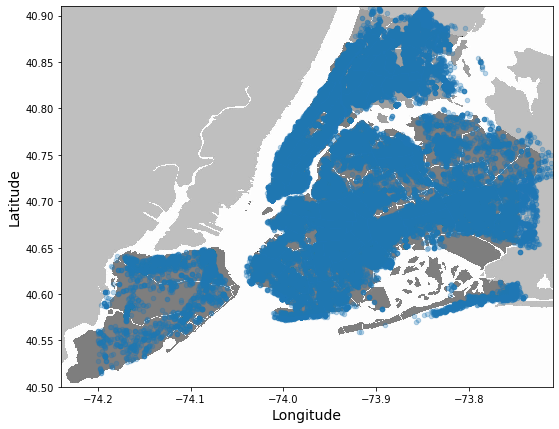

In [40]:
arrestsSub=arrests.head(100000)
raceplot = arrestsSub.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7), alpha=0.3)
# overlay the califronia mapon the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(new_york_image, extent=[-74.24, -73.71, 40.50,40.91], alpha=0.9,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()